In [45]:
%matplotlib inline
import sys
from collections import defaultdict
import matplotlib.pylab as plt

In [ ]:
sys.path.insert(0, '../')
from workers import load_sensible_data as lsd

### Preliminary analysis

In [12]:
tc0 = {'hours': range(24), 'days': range(7), 'spans': [("06/01/14","24/01/14")]} #in school
df_tmp = lsd.load(tc0['spans'], "screen")

<2014> jan


In [76]:
## Investigating on/off patterns
a, a_t = 0, []
e11, e11_t = 0, []
e00, e00_t = 0, []
u_e11 = defaultdict(int)
u_e00 = defaultdict(int)

users = sorted(set(df_tmp['user']))
df_tmp = df_tmp.sort(['user','timestamp'],ascending=[1,1])
for u in users:
    df = df_tmp[df_tmp['user'] == u]
    screen_on = list(df['screen_on'])
    for i, _ in enumerate(screen_on):
        if i == 0: continue
        if screen_on[i] == 1 and screen_on[i-1] == 1:
            e11 += 1
            u_e11[u] += 1
            e11_t.append(df.iloc[i,:]['timestamp']-df.iloc[i-1,:]['timestamp'])
        elif screen_on[i] == 0 and screen_on[i-1] == 0:
            e00 += 1
            u_e00[u] += 1
            e00_t.append(df.iloc[i,:]['timestamp']-df.iloc[i-1,:]['timestamp'])
        else:
            a += 1
            a_t.append(df.iloc[i,:]['timestamp']-df.iloc[i-1,:]['timestamp'])
    print u,

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 123 124 125 126 127 128 129 130 131 132 133 134 135 136 138 139 140 141 142 143 144 145 146 147 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209

KeyboardInterrupt: 

11 rate: 0.41%
11 time: 6265.1785489
10 time: 644.97753824


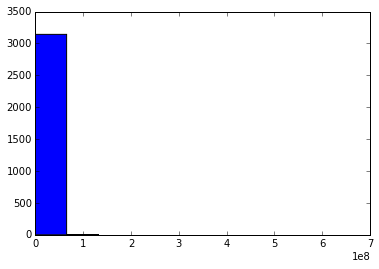

In [84]:
print "11 rate: %0.2f%%" % (e11*100.0/(a+e11+e00))
print "11 time:", sum(e11_t)*0.001/e11
print "10 time:", sum(a_t)*0.001/a
plt.hist(e11_t)
plt.xlim()
plt.show()

00 rate: 0.10%
00 time: 4562.12466844
10 time: 644.97753824


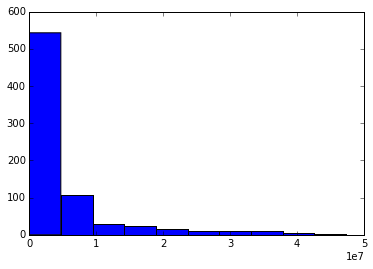

In [83]:
print "00 rate: %0.2f%%" % (e00*100.0/(a+e11+e00))
print "00 time:", sum(e00_t)*0.001/e00
print "10 time:", sum(a_t)*0.001/a
plt.hist(e00_t)
plt.xlim()
plt.show()

In [86]:
from extractors.screen_extractor import Screen_extractor

In [113]:
tc0 = {'hours': range(24), 'days': range(7), 'spans': [("06/01/14","24/01/14"), ("03/02/14","16/05/14"), ("01/09/14","05/12/14"), ("02/06/14","20/06/14")]} #in school
screen = Screen_extractor(tc0, suppress=[], auxlabel="tc0_", load_old_datasources=True)

[screen] Loading datasource from local.
[screen] Number of datapoints in range: 20211170


In [116]:
screen.df_screen

,screen_on,timestamp,user
277967,1,1388966400000,114
281729,0,1388966400000,216
300164,1,1388966401000,739
277880,1,1388966401000,492
428942,1,1388966402000,554
561659,1,1388966403000,257
279037,1,1388966403000,50
302060,0,1388966404000,309
285100,1,1388966404000,350
428943,0,1388966405000,554


In [194]:
def __get_user_sessions(user):
    df = screen.df_screen[screen.df_screen['user']==user].sort(['timestamp'], ascending=[1])
    sessions = []
    i = 0
    for row in df.iterrows():
        event = row[1]['screen_on']
        times = row[1]['timestamp']
        if i == 0:
            prev_event = event
            prev_times = times
            i+=1; continue
        elif event == 0 and prev_event == 1:
            duration = (times-prev_times)/1000
            sessions.append((prev_times/1000,duration))
        
            if times == prev_times:
                print i, times, prev_times, event, prev_event
            
        prev_event = event
        prev_times = times
            
        i+=1
    
    return df

df = __get_user_sessions(1)

138 1389137758000 1389137758000 0 1
144 1389138360000 1389138360000 0 1
262 1389252718000 1389252718000 0 1
280 1389256361000 1389256361000 0 1
344 1389278756000 1389278756000 0 1
410 1389344071000 1389344071000 0 1
452 1389365852000 1389365852000 0 1
456 1389366275000 1389366275000 0 1
504 1389382780000 1389382780000 0 1
538 1389395940000 1389395940000 0 1
770 1389691897000 1389691897000 0 1
876 1389824456000 1389824456000 0 1
888 1389825014000 1389825014000 0 1
994 1389960539000 1389960539000 0 1
1038 1389991447000 1389991447000 0 1
1190 1390135429000 1390135429000 0 1
1224 1390204656000 1390204656000 0 1
1260 1390235559000 1390235559000 0 1
1290 1390257172000 1390257172000 0 1
1368 1390376805000 1390376805000 0 1
1394 1390388476000 1390388476000 0 1
1452 1390430408000 1390430408000 0 1
1560 1390508890000 1390508890000 0 1
1576 1390513452000 1390513452000 0 1
1620 1391428179000 1391428179000 0 1
1648 1391433271000 1391433271000 0 1
1730 1391522691000 1391522691000 0 1
2075 1391794736

In [156]:
x = [i[1] for i in tmp]

In [196]:
df.iloc[range(130,145),:]

,screen_on,timestamp,user
466296,1,1389127530000,1
466297,0,1389127536000,1
410657,1,1389136416000,1
410658,0,1389136418000,1
410659,1,1389136648000,1
410660,0,1389136655000,1
410661,1,1389137709000,1
410663,1,1389137758000,1
410662,0,1389137758000,1
410664,0,1389137776000,1


In [166]:
tmp

,screen_on,timestamp,user
433351,1,1388993400000,1
433352,0,1388993418000,1
433353,1,1388994607000,1
433354,0,1388994633000,1
433355,1,1388995136000,1
433356,0,1388995139000,1
433357,1,1388995288000,1
433358,0,1388995525000,1
510473,1,1388996010000,1
510474,0,1388996011000,1


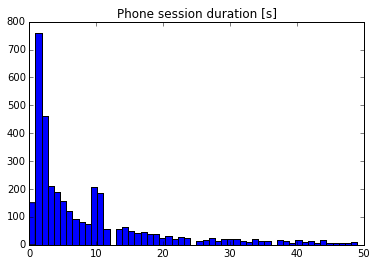

In [202]:
plt.hist(x,bins=8000)
plt.title("Phone session duration [s]")
plt.xlim([0,50])
plt.show()

In [164]:
sorted(x)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [132]:
from datetime import datetime as dt

In [151]:
start = dt.now()
for row in df.iterrows():
    a = row[1]['screen_on']
    b = row[1]['timestamp']
print dt.now() - start

0:00:00.096809


In [150]:
type(df.iterrows().next()[1]['screen_on'])

numpy.int64

In [144]:
a

screen_on                0
timestamp    1391200000000
user                   210
Name: 2197353, dtype: int64